# Analysis

This notebook contains the analysis of the cleaned dataset, the genre, and topic classes

In [1]:
import pandas as pd
import tiktoken
import os
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

directory = './data/ncse_text_chunks'

dev_transcripts = 'data/dev_data_transcript'

dev_gpt4_results = 'data/dev_data_gpt-4-turbo-preview'
dev_gpt3_results = 'data/dev_data_gpt-3.5-turbo'


# Basic data set information

This section just provides basic information about the dataset for the methods section of the paper

In [2]:
periodicals_page_df = pd.read_parquet('./data/periodicals_page.parquet').rename(columns={'number':'page_number'})
periodicals_page_df = periodicals_page_df[['id', 'page_number']]

periodicals_publication_df = pd.read_parquet('./data/periodicals_publication.parquet')

periodicals_publication_df['title'] = periodicals_publication_df['title'].str.replace(r"\s\(\d{4}\-\d{4}\)", "", regex=True)

periodicals_publication_df= periodicals_publication_df.sort_values('year_from')

periodicals_publication_df

,id,abbreviation,slug,title,description,ordering,title_image,year_from,year_to,issue_count,page_count,article_count,headnotes_url,weekly
5,22,MRUC,mruc,Monthly Repository and Unitarian Chronicle,,1806,monthly-respository.jpg,1806,1837,487,26783,51202,/headnotes/mrp.html,False
0,27,NS,ns,Northern Star,,1837,northern-star.jpg,1837,1852,2201,17853,230596,/headnotes/nss.html,True
1,20,L,l,Leader,,1850,leader.jpg,1850,1860,1011,24456,162431,/headnotes/ldr.html,True
4,24,EWJ,ewj,English Woman’s Journal,,1858,english-womens-journal.jpg,1858,1864,91,5663,8061,/headnotes/ewj.html,False
2,19,T,t,Tomahawk,,1867,tomahawk.jpg,1867,1870,188,2125,12825,/headnotes/ttw.html,True
3,26,PC,pc,Publishers’ Circular,,1880,publishers-circular.jpg,1880,1890,285,20827,56739,/headnotes/tec.html,True


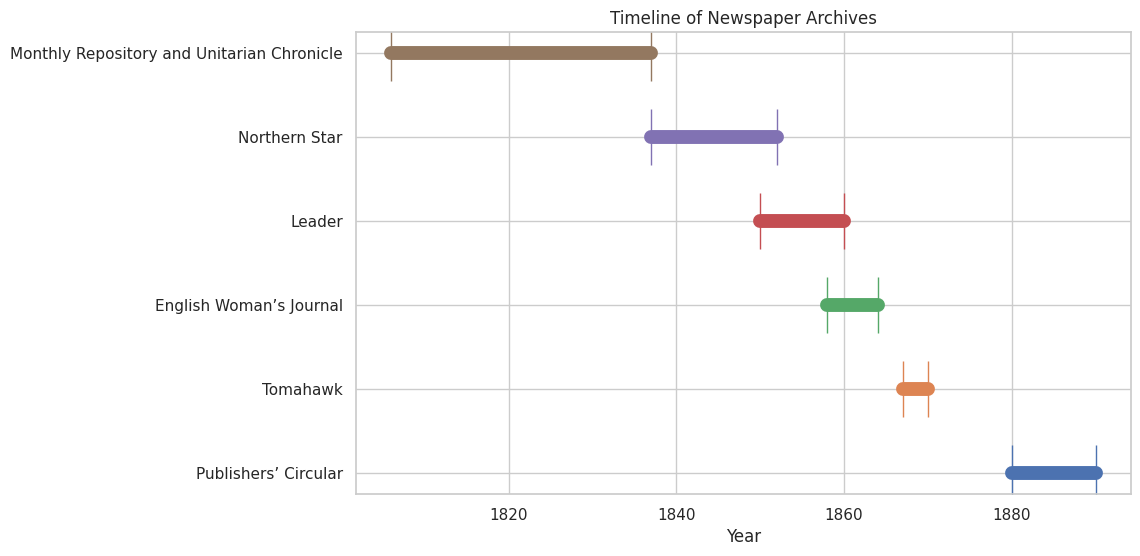

In [3]:
# Sort the DataFrame by 'year_from'
sorted_df = periodicals_publication_df.sort_values(by='year_from', ascending=False).reset_index(drop=True)

# Set the style
sns.set(style="whitegrid")

# Create a new figure
plt.figure(figsize=(10, 6))

for i, row in sorted_df.iterrows():
    plt.plot([row['year_from'], row['year_to']], [i, i], marker = '|', markersize = 40, linewidth=10)

plt.yticks(range(len(sorted_df)), sorted_df['title'])
plt.xlabel('Year')
plt.title('Timeline of Newspaper Archives')

plt.show()
